In [76]:
#read date&time from csv
import csv
def read_date(pth):
    dates=[]
    with open(pth, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            if(len(row[0].split('-')) != 3):
                continue
            #print(row[0])
            y,m,d=row[0].split('-')
            dates.append({'year':int(y), 'mon':int(m), 'day':int(d)})
    return dates

def read_stock(pth):
    records=[]
    with open(pth, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            if(len(row[0].split('/')) != 3):
                continue
            y,m,d = row[0].split('/')
            date = {'year':int(y), 'mon':int(m), 'day':int(d)}
            records.append(
                {'date':date, 'open':float(row[1]),
                 'volume':float(row[2]), 'close':float(row[3]),
                 'high':float(row[4]), 'low':float(row[5])}
            )
    return records

In [3]:
def count(dates):
    rst={}
    for d in dates:
        if d['year'] not in rst:
            rst[d['year']]=[0]*12 
        rst[d['year']][d['mon']-1] += 1  
    return rst

In [74]:
"""
sum up vals for each key
records: list
getKey: function
    getKey(record) to return key
getVal: function
    getKey(record) to return value
"""
def sumUp(records, getKey, getVal):
    rst={}
    for r in records:
        k = getKey(r)
        v = getVal(r)
        if k not in rst:
            rst[k]=0
        rst[k] += v
    return rst

In [15]:
#draw distrubtion each month
import matplotlib.pyplot as plt
import datetime

def drawMonBar(dist, title=''):
    count=[0]*12
    yFrom = 3000
    yTo = 0
    for k in dist:
        v = dist[k]
        #ignore this year as not valid data
        if k!=datetime.datetime.now().year:
            yFrom = min(k, yFrom)
            yTo = max(k, yTo)
            count=[count[i] + v[i] for i in range(12)]  
    bars=plt.bar(left=[i for i in range(1, 13)], height=count)
    plt.xlabel('month', rotation='horizontal')
    plt.ylabel('number', rotation='vertical')
    plt.title("{0}({1}~{2})".format(title, yFrom, yTo))
    plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
    plt.show()
    

In [91]:
#draw distrubtion each year
import matplotlib.pyplot as plt
import datetime


def drawYearBar(records, title='', yFrom=3000, yTo=-1):
    yearDict={}
    count=[0]*(yTo-yFrom+1)
    for r in records:
        if r['year']!=datetime.datetime.now().year:
            count[r['year']-yFrom]+=1
    print(count)
    bars=plt.bar(left=[i for i in range(yFrom, yTo+1)], height=count)
    plt.xlabel('year', rotation='horizontal')
    plt.ylabel('number', rotation='vertical')
    plt.title("{0}({1}~{2})".format(title, yFrom, yTo))
    plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
    plt.show()

"""
drawYearlyBar
records: list of dict
    r={'year':val}
"""
def yearlyBar(records, title, yFrom, yTo):
    years=[y for y in records if (y>=yFrom and y<=yTo)]
    height=[records[y] for y in records if (y>=yFrom and y<=yTo)]
    bars=plt.bar(left=years, height=height)
    plt.xlabel('year', rotation='horizontal')
    plt.ylabel('number', rotation='vertical')
    plt.title("{0}({1}~{2})".format(title, yFrom, yTo))
    plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
    plt.show()

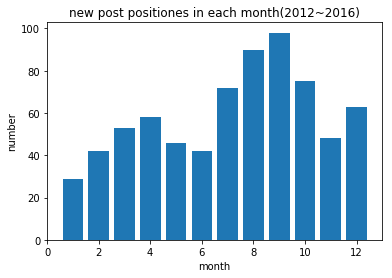

In [19]:
newPos = read_date('new-position-date.csv')
posDist = count(newPos)
drawMonBar(posDist, 'new post positiones in each month')
#

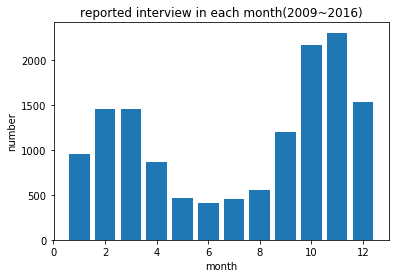

In [23]:
intRep = read_date('interview-report-date.csv')
intDist = count(intRep)
drawMonBar(intDist, 'reported interview in each month')

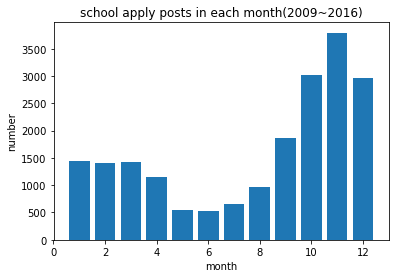

In [25]:
schAply = read_date('school-apply-date.csv')
schDist = count(schAply)#09-16
drawMonBar(schDist, 'school apply posts monthly')

[745, 1362, 2286, 2916, 3153, 2796, 2615, 3900]


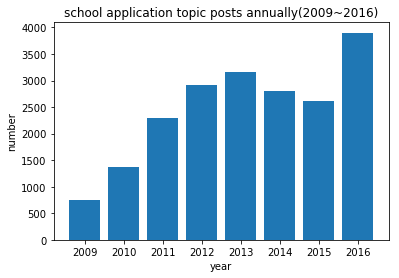

In [80]:
drawYearBar(schAply, 'school application topic posts annually', 2009, 2016)

[29, 175, 70, 35]


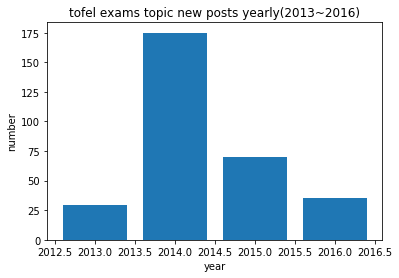

In [81]:
drawYearBar(tofel, 'tofel exams topic new posts yearly', 2013, 2016)

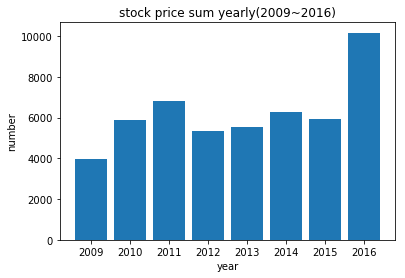

In [95]:
#EDU stock
records = read_stock('EDU_stock_history.csv')
yearSum = sumUp(records, lambda r: r['date']['year'], lambda r: r['close'] )
yearlyBar(yearSum, 'stock price sum yearly', 2009, 2016)

In [98]:
def monthlyBar(records, title, yFrom = -1, yTo = 3000):
    month=[y for y in records if (y>=yFrom and y<=yTo)]
    val=[records[y] for y in records if (y>=yFrom and y<=yTo)]
    bars=plt.bar(left=key, height=val)
    plt.xlabel('month', rotation='horizontal')
    plt.ylabel('sum', rotation='vertical')
    plt.title("{0}({1}~{2})".format(title, yFrom, yTo))
    plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
    plt.show()

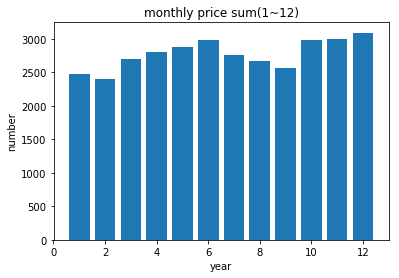

In [113]:
def getPrice(r):
    if(r['date']['year'] >= 2012 and r['date']['year']<=2016):
        return r['close']
    return 0

monthSum = sumUp(records, lambda r: r['date']['mon'], getPrice )
yearlyBar(monthSum,'monthly price sum',1,12)

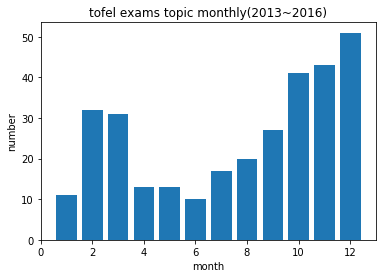

In [58]:
tofel = read_date('tofel.csv')
tofelM = count(tofel)#09-16
drawMonBar(tofelM, 'tofel exams topic monthly')